## HOMEWORK TG 5014 - TIME-SPATIAL SERIES DATA ANALYSIS - S-TRANSFORM
### NAME: REYNALDI SUBANGKIT
### NIM: 223252005

## INSTRUCTION
### Given 4 signals (i) modulated sine wave, (ii) chirp, (iii) cross_chirp, dan (iv) two time series.
#### Length = 128

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from stockwell.st import st

length = 128
dt = 1*0.1
fs=1/dt
t = np.arange(0,length,dt)
print (fs)

10.0


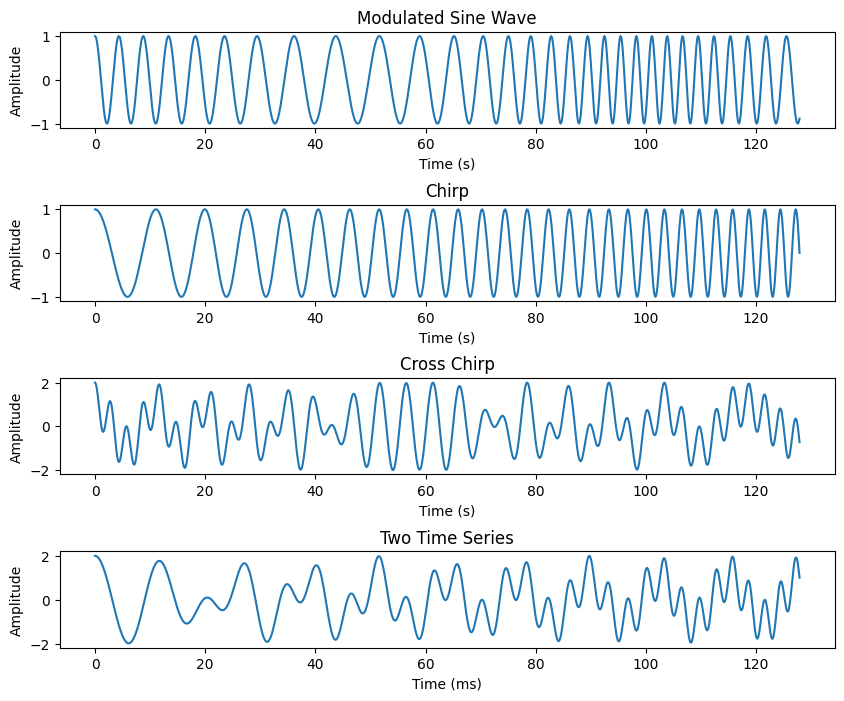

In [39]:
#SIGNAL CALCULATIONS

mod_sin_freq = 4*np.cos(2*np.pi*t/length)+length/5;
mod_sin = np.cos(2*np.pi*mod_sin_freq*t/length)
#print("Mod Sin Freq:/n", mod_sin_freq)
#print("Mod Sin:/n", mod_sin)
chirp = np.cos(2*np.pi*(10+t/7)*t/length)
cross_chirp = np.cos(2*np.pi*(10+t/7)*t/length)+np.cos(2*np.pi*(length/2.8 - t/6)*t/length)
time1 = np.cos(2*np.pi*10*t/length)
time2 = np.cos(2*np.pi*(10+t/7)*t/length)
two_time = time1+time2

fig, axs = plt.subplots(4, 1, figsize=(10, 8))
#Modulated Sine Wave Plot
axs[0].plot(t,mod_sin)
axs[0].set_title("Modulated Sine Wave")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")

#Chirp Plot
axs[1].plot(t,chirp)
axs[1].set_title("Chirp")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")

#Cross Chirp Plot
axs[2].plot(t,cross_chirp)
axs[2].set_title("Cross Chirp")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Amplitude")

#Two Time Series Plot
axs[3].plot(t,two_time)
axs[3].set_title("Two Time Series")
axs[3].set_xlabel("Time (ms)")
axs[3].set_ylabel("Amplitude")

fig.subplots_adjust(hspace=0.8)

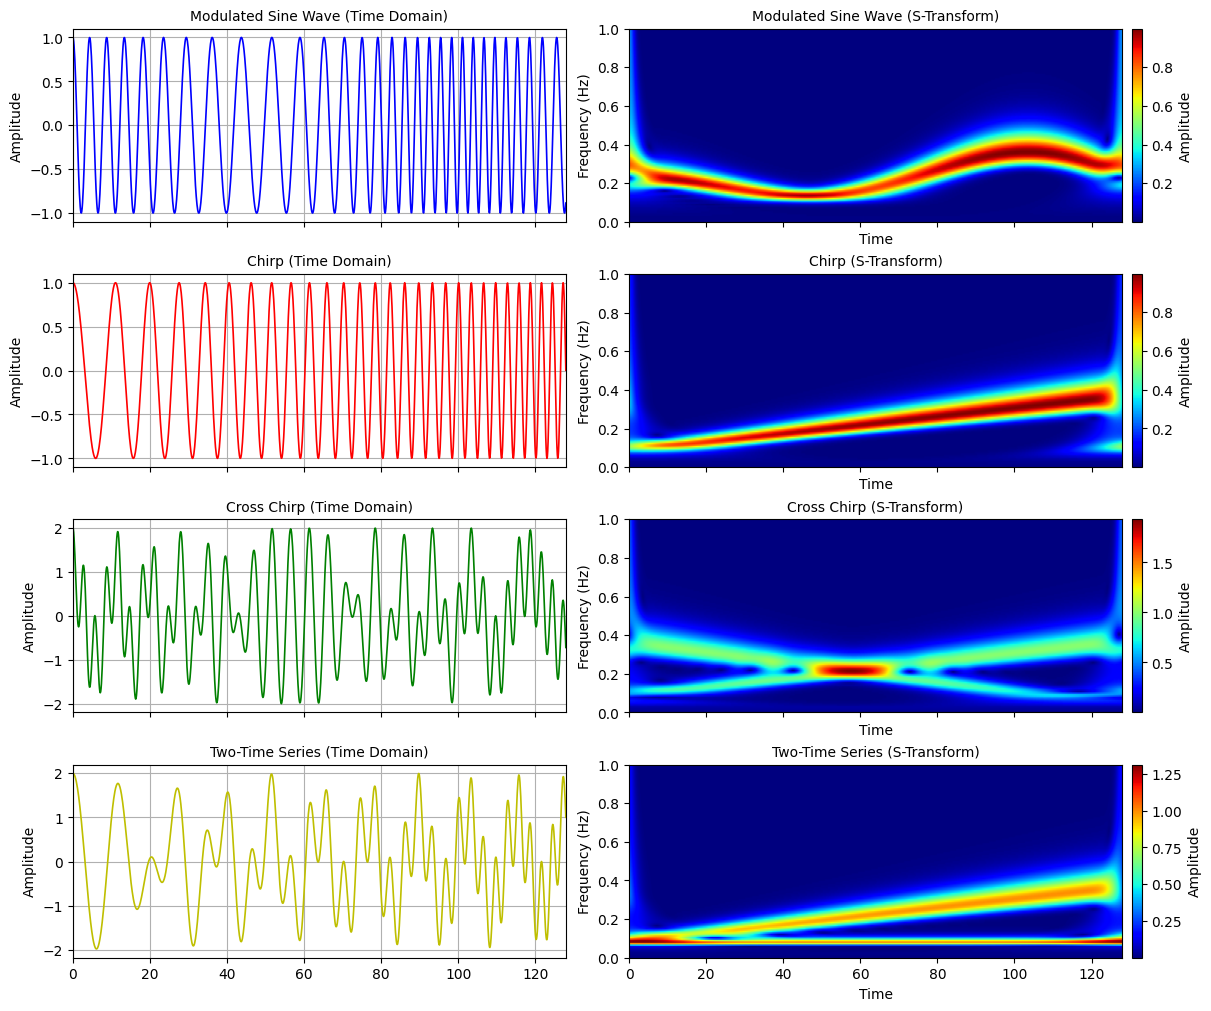

In [40]:
signals = {
    "Modulated Sine Wave": mod_sin,
    "Chirp": chirp,
    "Cross Chirp": cross_chirp,
    "Two-Time Series": two_time
}

# --- 3. Color palette for time-domain signals ---
colors = ['b', 'r', 'g', 'y']

# --- 4. Create figure ---
fig, axes = plt.subplots(len(signals), 2, figsize=(12, 10),
                         constrained_layout=True, sharex='col')

# --- 5. Loop over signals ---
for i, ((name, sig), color) in enumerate(zip(signals.items(), colors)):
    # --- Time-domain plot ---
    ax_time = axes[i, 0]
    ax_time.plot(t, sig, color=color, linewidth=1.2)
    ax_time.set_ylabel("Amplitude")
    ax_time.set_title(f"{name} (Time Domain)", fontsize=10)
    ax_time.grid(True)
    ax_time.set_xlim(t[0], t[-1])

    # --- S-Transform ---
    st_matrix = st(sig)
    st_amp = np.abs(st_matrix)

    n_freq, n_time = st_amp.shape
    freqs = np.linspace(0, fs / 2, n_freq)
    time_axis = np.linspace(t[0], t[-1], n_time)

    ax_st = axes[i, 1]
    im = ax_st.imshow(
        st_amp,
        extent=[time_axis[0], time_axis[-1], freqs[0], freqs[-1]],
        origin="lower",
        aspect="auto",
        cmap="jet"
    )

    ax_st.set_ylim(0, 1)  
    ax_st.set_title(f"{name} (S-Transform)", fontsize=10)
    ax_st.set_xlabel("Time")
    ax_st.set_ylabel("Frequency (Hz)")

    cbar = fig.colorbar(im, ax=ax_st, orientation="vertical", fraction=0.05, pad=0.02)
    cbar.set_label("Amplitude")

# --- 6. Final layout ---
plt.show()


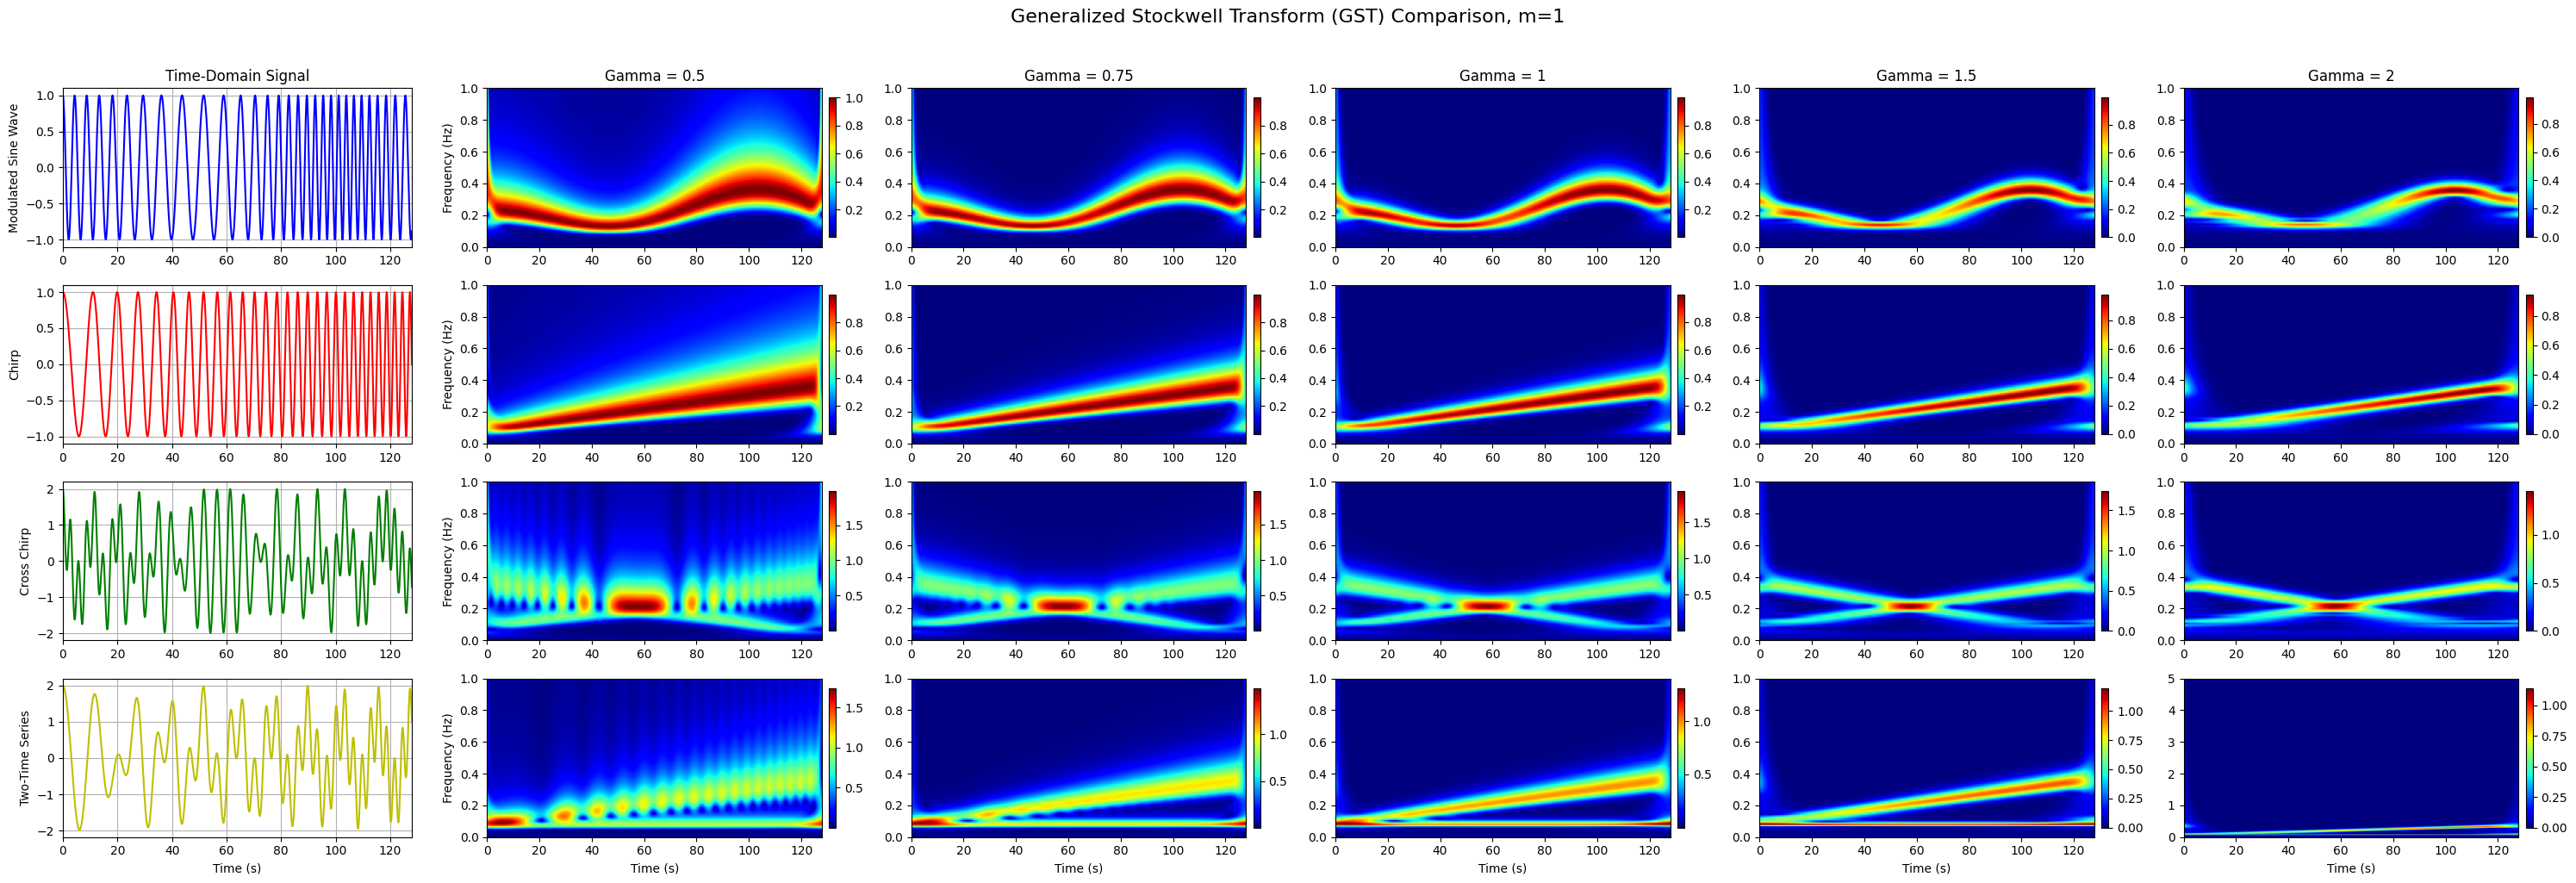

In [41]:
gammas = [0.5, 0.75, 1, 1.5, 2]  # Variation of Gamma values for generalized S-Transform

# --- Prepare plot grid ---
fig, axes = plt.subplots(len(signals), len(gammas) + 1, figsize=(30, 10))
fig.suptitle("Generalized Stockwell Transform (GST) Comparison, m=1", fontsize=16, y=1.02)

# --- Loop through each signal ---
for i, (label, sig) in enumerate(signals.items()):
    # --- Time-domain signal ---
    ax_time = axes[i, 0]
    ax_time.plot(t, sig, color=colors[i])
    ax_time.set_ylabel(label, fontsize=10)
    ax_time.set_xlim(t[0], t[-1])
    ax_time.grid(True)
    if i == len(signals) - 1:
        ax_time.set_xlabel("Time (s)")
    if i == 0:
        ax_time.set_title("Time-Domain Signal")

    # --- Compute GST for each gamma ---
    for j, g in enumerate(gammas):
        ax_st.set_ylim(0, 1)
        st_matrix = st(sig, gamma=g)
        st_amp = np.abs(st_matrix)

        # --- Axes ---
        n_freq, n_time = st_amp.shape
        freqs = np.linspace(0, fs / 2, n_freq)
        time_axis = np.linspace(t[0], t[-1], n_time)

        # --- Plot GST ---
        ax_st = axes[i, j + 1]
        im = ax_st.imshow(
            st_amp,
            extent=[time_axis[0], time_axis[-1], freqs[0], freqs[-1]],
            origin='lower',
            aspect='auto',
            cmap='jet'
        )
        if i == len(signals) - 1:
            ax_st.set_xlabel("Time (s)")
        if j == 0:
            ax_st.set_ylabel("Frequency (Hz)")
        if i == 0:
            ax_st.set_title(f"Gamma = {g}")
        fig.colorbar(im, ax=ax_st, fraction=0.02, pad=0.02)

# --- Layout ---
plt.tight_layout()
plt.show()


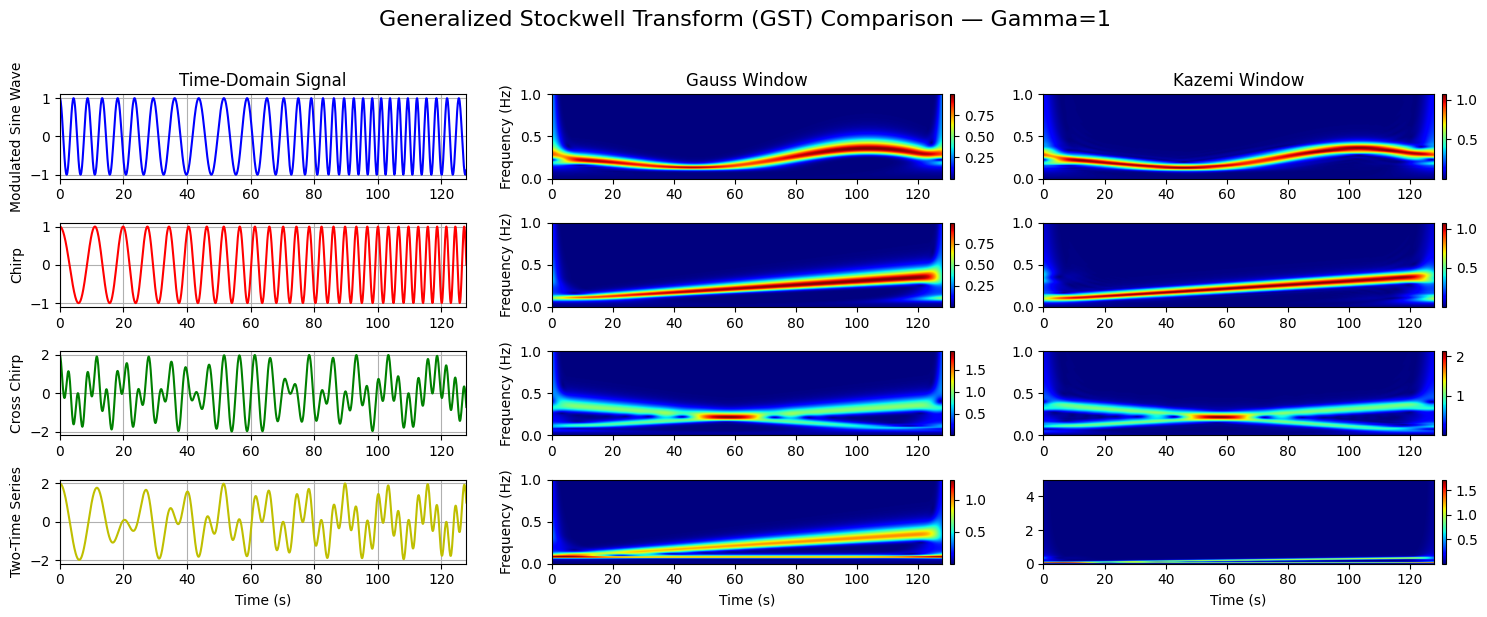

In [44]:
# --- Comparison setup ---
gamma = 1
window_types = ["gauss", "kazemi"]

# --- Prepare plot grid ---
fig, axes = plt.subplots(len(signals), len(window_types) + 1, figsize=(15, 6))
fig.suptitle(f"Generalized Stockwell Transform (GST) Comparison — Gamma={gamma}", fontsize=16, y=1.02)

# --- Loop through each signal ---
for i, (label, sig) in enumerate(signals.items()):
    # --- Time-domain plot ---
    ax_time = axes[i, 0]
    ax_time.plot(t, sig, color=colors[i])
    ax_time.set_ylabel(label, fontsize=10)
    ax_time.set_xlim(t[0], t[-1])
    ax_time.grid(True)
    if i == len(signals) - 1:
        ax_time.set_xlabel("Time (s)")
    if i == 0:
        ax_time.set_title("Time-Domain Signal")

    # --- Compute & plot S-transform for each window type ---
    for j, wtype in enumerate(window_types):
        st_matrix = st(sig, gamma=gamma, win_type=wtype)
        st_amp = np.abs(st_matrix)
        ax_st.set_ylim(0, 1)

        # --- Frequency & time axes ---
        n_freq, n_time = st_amp.shape
        freqs = np.linspace(0, fs / 2, n_freq)
        time_axis = np.linspace(t[0], t[-1], n_time)

        # --- Plot ---
        ax_st = axes[i, j + 1]
        im = ax_st.imshow(
            st_amp,
            extent=[time_axis[0], time_axis[-1], freqs[0], freqs[-1]],
            origin="lower",
            aspect="auto",
            cmap="jet"
        )
        if i == len(signals) - 1:
            ax_st.set_xlabel("Time (s)")
        if j == 0:
            ax_st.set_ylabel("Frequency (Hz)")
        if i == 0:
            ax_st.set_title(f"{wtype.capitalize()} Window")

        
        fig.colorbar(im, ax=ax_st, fraction=0.02, pad=0.02)

# --- Layout ---
plt.tight_layout()
plt.show()
